Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

# I. Wrangle Data

In [2]:
DATA_PATH ='data/esrb/'

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, plot_confusion_matrix, precision_score, recall_score, classification_report

In [4]:
def wrangle(fm_path):
    df = pd.read_csv(DATA_PATH + fm_path,
    index_col='title')
    return df
pd.set_option('display.max_columns', None)

In [5]:
df = wrangle('Video_games_esrb_rating.csv')
X_test = wrangle('test_esrb.csv')

# II. Data Exploration

In [6]:
df.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,M
Jamestown+,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,T


In [7]:
df.shape

(1895, 33)

In [8]:
df.isna().sum().sum()

0

In [9]:
df['console'].value_counts()

0    994
1    901
Name: console, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1895 entries, Monster Jam Steel Titans 2 to Surf World Series
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   console                   1895 non-null   int64 
 1   alcohol_reference         1895 non-null   int64 
 2   animated_blood            1895 non-null   int64 
 3   blood                     1895 non-null   int64 
 4   blood_and_gore            1895 non-null   int64 
 5   cartoon_violence          1895 non-null   int64 
 6   crude_humor               1895 non-null   int64 
 7   drug_reference            1895 non-null   int64 
 8   fantasy_violence          1895 non-null   int64 
 9   intense_violence          1895 non-null   int64 
 10  language                  1895 non-null   int64 
 11  lyrics                    1895 non-null   int64 
 12  mature_humor              1895 non-null   int64 
 13  mild_blood                1895 non-null   int

# III. Split Data

In [18]:
target = 'esrb_rating'
X = df.drop(columns=target)
y = df[target]

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [79]:
print(X.corr().abs())

    0.051871   
language                          0.111730  1.000000  0.036156      0.006026   
lyrics                            0.068863  0.036156  1.000000      0.020098   
mature_humor                      0.051871  0.006026  0.020098      1.000000   
mild_blood                        0.055239  0.044850  0.018635      0.009048   
mild_cartoon_violence             0.093188  0.054319  0.009590      0.015452   
mild_fantasy_violence             0.074587  0.054385  0.014116      0.024341   
mild_language                     0.054447  0.016761  0.027577      0.016117   
mild_lyrics                       0.105783  0.100627  0.053578      0.031313   
mild_suggestive_themes            0.167331  0.075009  0.039938      0.023341   
mild_violence                     0.010463  0.005880  0.041409      0.024201   
no_descriptors                    0.122131  0.080675  0.060389      0.035918   
nudity                            0.090633  0.084078  0.074876      0.068387   
partial_nudity          

# IV. Establish Baseline

In [20]:
y_train.value_counts(normalize=True).max()

0.36147757255936674

In [21]:
model_rf = RandomForestClassifier(random_state=42,
                                n_jobs=-2)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-2, random_state=42)

# V. Check Metrics

In [48]:
print('Training accuracy', model_rf.score(X_train, y_train))
print('Validation accuracy', model_rf.score(X_val, y_val))

Training accuracy 0.9254617414248021
Validation accuracy 0.8469656992084432


0.8469656992084432

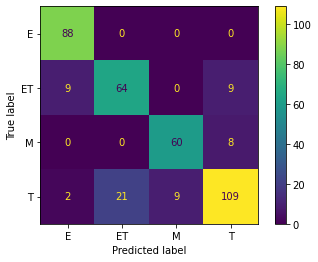

In [23]:
plot_confusion_matrix(model_rf, X_val, y_val)
plt.show()

# VI. Tune Model

In [84]:
params = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [5, 6, 7, 8, 9],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_jobs': [-2],
    'random_state': [42]
}

model = RandomizedSearchCV(
    estimator=RandomForestClassifier(), 
    param_distributions=params,
    n_iter=50,
    cv=10,
    random_state=42,
    n_jobs=-2
)
model.fit(X, y);

In [85]:
best_score = model.best_score_
best_params = model.best_params_

print('Best score for `model`:', best_score)
print('Best params for `model`:', best_params)

Best score for `model`: 0.8327791701475912
Best params for `model`: {'random_state': 42, 'n_jobs': -2, 'n_estimators': 100, 'max_features': 'auto', 'max_depth': 9}


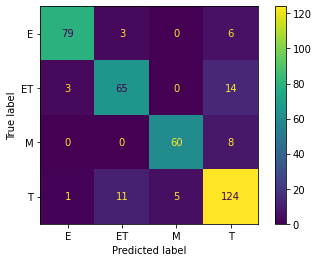

In [86]:
plot_confusion_matrix(model, X_val, y_val)
plt.show()

In [87]:
report = classification_report(y_val, model.predict(X_val))
print(report)

              precision    recall  f1-score   support

           E       0.95      0.90      0.92        88
          ET       0.82      0.79      0.81        82
           M       0.92      0.88      0.90        68
           T       0.82      0.88      0.85       141

    accuracy                           0.87       379
   macro avg       0.88      0.86      0.87       379
weighted avg       0.87      0.87      0.87       379



In [63]:
model_skgb = GradientBoostingClassifier(random_state=42)
model_skgb.fit(X_train, y_train);

In [64]:
print('sklearn Training Accuracy:', model_skgb.score(X_train, y_train))
print('sklearn Validation Accuracy:', model_skgb.score(X_val, y_val))

sklearn Training Accuracy: 0.8951187335092349
sklearn Validation Accuracy: 0.8575197889182058


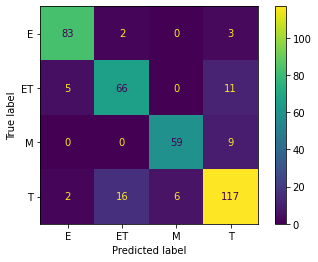

In [71]:
plot_confusion_matrix(model_skgb, X_val, y_val)
plt.show()

In [72]:
report_skgb = classification_report(y_val, model_skgb.predict(X_val))
print(report_skgb)

              precision    recall  f1-score   support

           E       0.92      0.94      0.93        88
          ET       0.79      0.80      0.80        82
           M       0.91      0.87      0.89        68
           T       0.84      0.83      0.83       141

    accuracy                           0.86       379
   macro avg       0.86      0.86      0.86       379
weighted avg       0.86      0.86      0.86       379



In [65]:
perm_imp = permutation_importance(
    model_skgb,
    X_val, 
    y_val,
    n_repeats=5,
    n_jobs=-1,
    random_state=42
)

In [66]:
data = {'imp_mean': perm_imp['importances_mean'],
      'imp_std': perm_imp['importances_std']}

permu_table = pd.DataFrame(data, index=X_val.columns).sort_values('imp_mean')

In [67]:
permu_table

,imp_mean,imp_std
nudity,0.000000,0.000000
mild_suggestive_themes,0.000000,0.002360
use_of_drugs_and_alcohol,0.000000,0.000000
lyrics,0.000528,0.001974
partial_nudity,0.000528,0.001974
sexual_content,0.000528,0.001055
animated_blood,0.001055,0.001293
mild_lyrics,0.002111,0.003077
mature_humor,0.002111,0.001055
mild_cartoon_violence,0.004222,0.002111


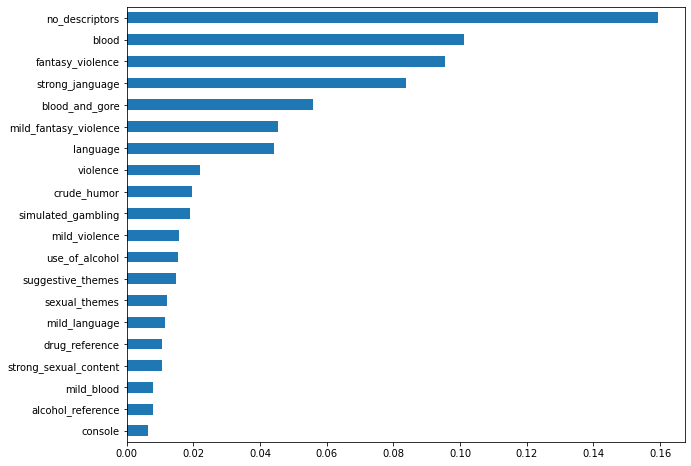

In [69]:
plt.figure(figsize=(10,8))
permu_table['imp_mean'].tail(20).plot(kind='barh');

## There is something counter-intuitive here. 'No descriptors' column which is basically no description about the content of a game is the most important to the model while 'nudity' and 'use of drugs and alchol' columns which should clearly use to classify mature content are the least important to the model

In [88]:
X['no_descriptors'].value_counts()

0    1573
1     322
Name: no_descriptors, dtype: int64